In [1]:
import os
import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt
import random
from numpy import expand_dims
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator

In [2]:
width = 128
heigth = 128
image_size = (128,128)
print(type(image_size))

<class 'tuple'>


In [3]:
root_dir = "PlantVillage/"

In [4]:
def Gray_scale_process_image(image_path , size):
    image = cv2.imread(image_path)
    if image is None:
        return np.array([])
    else:
        image = cv2.resize(image, size)
        image = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
        return image

In [5]:
def Gray_scale_augment_data(image_data , label_data , count , path , label,size):
    factor = int(1000/count)
    plant_dis_folder = os.listdir(path)
    
    for image in plant_dis_folder:
        
        if image.endswith('.jpg')== True or image.endswith('.JPG')== True :
           #load image in RGB format
            img = load_img(f"{path}/{image}")   
            data = img_to_array(img)
            
            #flattening along x-Axis
            samples = expand_dims(data,0)
            datagen = ImageDataGenerator(width_shift_range=0.2 , height_shift_range=0.2 , rotation_range=40 , shear_range=0.2 ,zoom_range=0.3,horizontal_flip=True , vertical_flip=True )
            it = datagen.flow(samples, batch_size=1)
            for i in range(factor):
                batch = it.next()
                aug_img = batch[0].astype('uint8')
                aug_img = cv2.resize(aug_img, size)
                aug_img = cv2.cvtColor(aug_img, cv2.COLOR_RGB2GRAY)
                image_data.append(aug_img)
                label_data.append(label)
            
    return image_data , label_data



In [6]:
def Gray_scale_create_dataset(size , root_path):
    image_data = []
    label_data = []
    
    print("Loading Images ....... ")
    
    root_dir = os.listdir(root_path)
    
    for label in root_dir:
        print("Working on ",label," .....")
        
        plant_dis_folder = os.listdir(f"{root_path}/{label}")
        image_count = 0
        for image in plant_dis_folder:
            
            image_path = f"{root_path}/{label}/{image}"
            
            if image.endswith('.jpg')== True or image.endswith('.JPG')== True :
                image_data.append(Gray_scale_process_image(image_path , size))
                label_data.append(label)
                image_count+=1
                
        if image_count<500 and image_count>0:
            path = f"{root_path}/{label}"
            image_data , label_data  = Gray_scale_augment_data(image_data , label_data , image_count , path , label , size) 
                
    print("Process Ends")
        
    return (image_data,label_data)


In [7]:
images , labels = Gray_scale_create_dataset(image_size , root_dir)

Loading Images ....... 
Working on  Pepper__bell___Bacterial_spot  .....
Working on  Pepper__bell___healthy  .....
Working on  Potato___Early_blight  .....
Working on  Potato___healthy  .....
Working on  Potato___Late_blight  .....
Working on  Tomato_Bacterial_spot  .....
Working on  Tomato_Early_blight  .....
Working on  Tomato_healthy  .....
Working on  Tomato_Late_blight  .....
Working on  Tomato_Leaf_Mold  .....
Working on  Tomato_Septoria_leaf_spot  .....
Working on  Tomato_Spider_mites_Two_spotted_spider_mite  .....
Working on  Tomato__Target_Spot  .....
Working on  Tomato__Tomato_mosaic_virus  .....
Working on  Tomato__Tomato_YellowLeaf__Curl_Virus  .....
Process Ends


In [8]:
len(images) , len(labels)

(22294, 22294)

In [9]:
np.shape(images)

(22294, 128, 128)

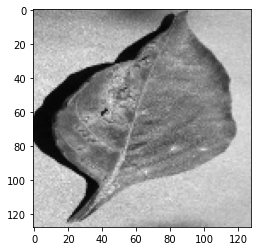

(128, 128)
Pepper__bell___Bacterial_spot


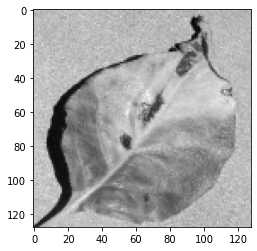

(128, 128)
Pepper__bell___Bacterial_spot


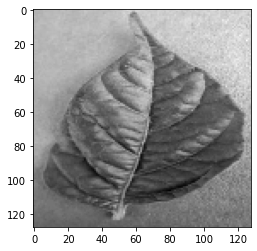

(128, 128)
Pepper__bell___healthy


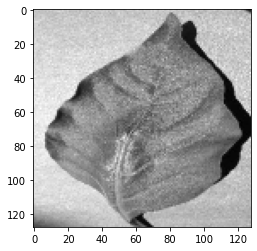

(128, 128)
Pepper__bell___healthy


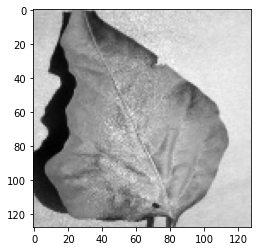

(128, 128)
Pepper__bell___healthy


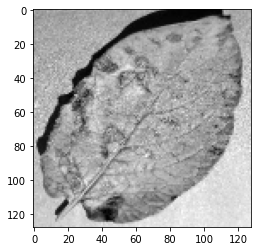

(128, 128)
Potato___Early_blight


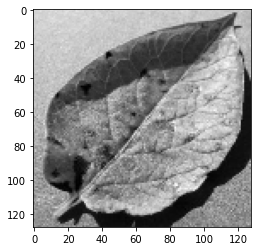

(128, 128)
Potato___Early_blight


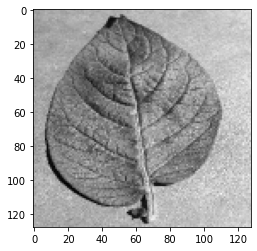

(128, 128)
Potato___healthy


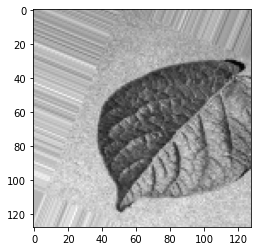

(128, 128)
Potato___healthy


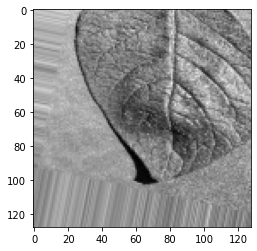

(128, 128)
Potato___healthy


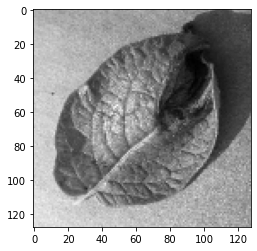

(128, 128)
Potato___Late_blight


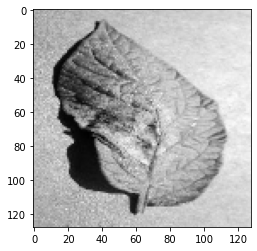

(128, 128)
Potato___Late_blight


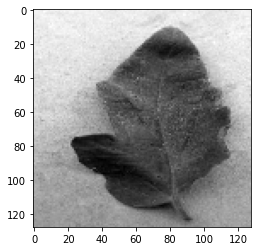

(128, 128)
Tomato_Bacterial_spot


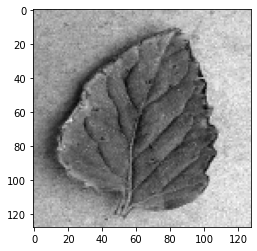

(128, 128)
Tomato_Bacterial_spot


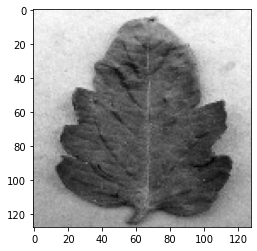

(128, 128)
Tomato_Bacterial_spot


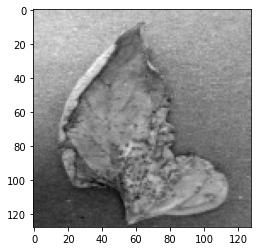

(128, 128)
Tomato_Bacterial_spot


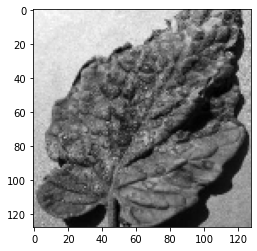

(128, 128)
Tomato_Early_blight


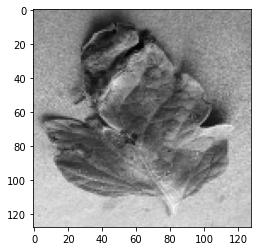

(128, 128)
Tomato_Early_blight


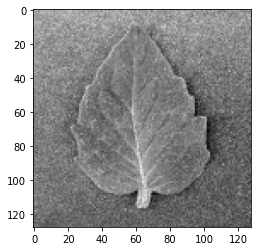

(128, 128)
Tomato_healthy


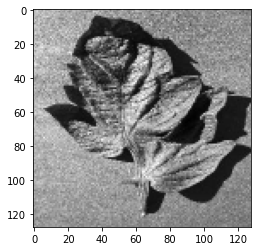

(128, 128)
Tomato_healthy


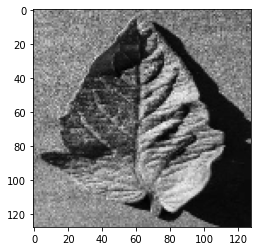

(128, 128)
Tomato_healthy


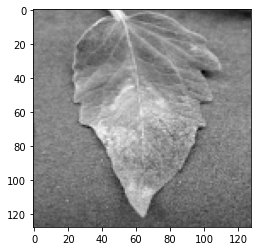

(128, 128)
Tomato_Late_blight


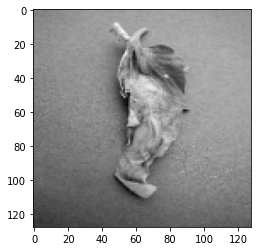

(128, 128)
Tomato_Late_blight


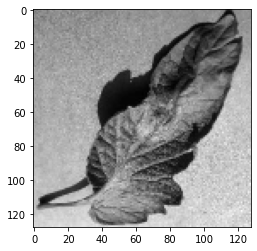

(128, 128)
Tomato_Late_blight


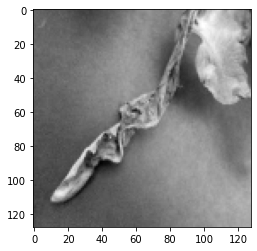

(128, 128)
Tomato_Late_blight


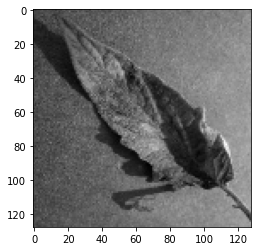

(128, 128)
Tomato_Leaf_Mold


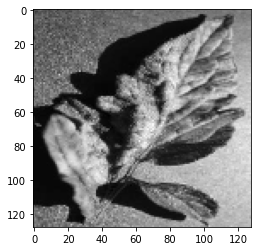

(128, 128)
Tomato_Leaf_Mold


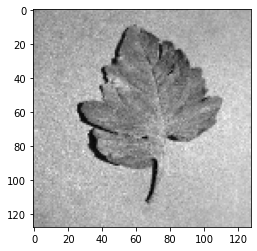

(128, 128)
Tomato_Septoria_leaf_spot


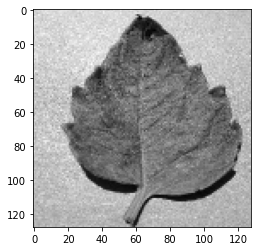

(128, 128)
Tomato_Septoria_leaf_spot


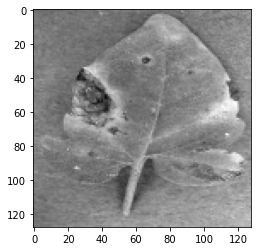

(128, 128)
Tomato_Septoria_leaf_spot


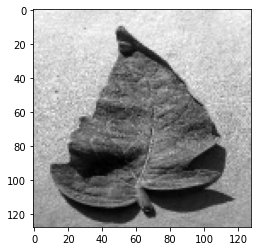

(128, 128)
Tomato_Spider_mites_Two_spotted_spider_mite


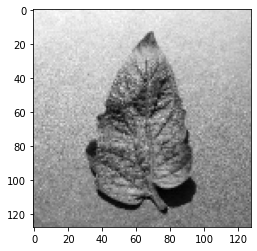

(128, 128)
Tomato_Spider_mites_Two_spotted_spider_mite


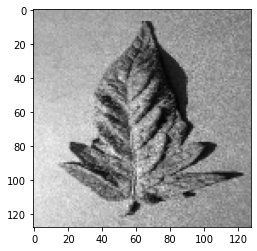

(128, 128)
Tomato_Spider_mites_Two_spotted_spider_mite


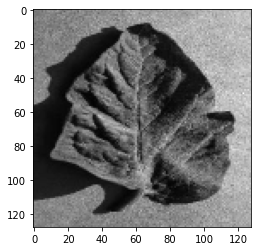

(128, 128)
Tomato_Spider_mites_Two_spotted_spider_mite


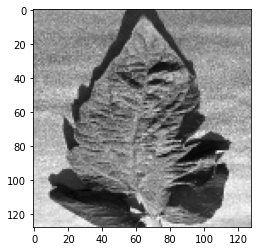

(128, 128)
Tomato__Target_Spot


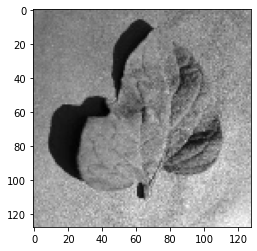

(128, 128)
Tomato__Target_Spot


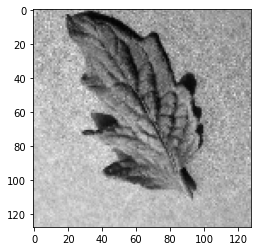

(128, 128)
Tomato__Tomato_mosaic_virus


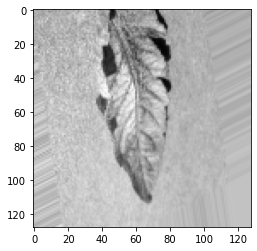

(128, 128)
Tomato__Tomato_mosaic_virus


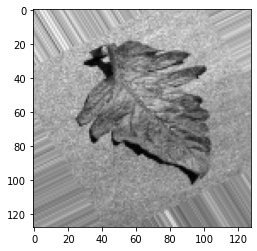

(128, 128)
Tomato__Tomato_mosaic_virus


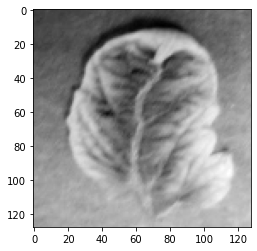

(128, 128)
Tomato__Tomato_YellowLeaf__Curl_Virus


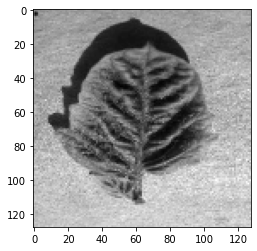

(128, 128)
Tomato__Tomato_YellowLeaf__Curl_Virus


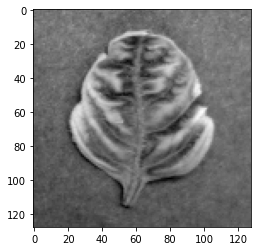

(128, 128)
Tomato__Tomato_YellowLeaf__Curl_Virus


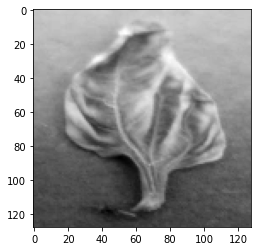

(128, 128)
Tomato__Tomato_YellowLeaf__Curl_Virus


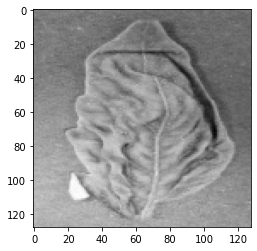

(128, 128)
Tomato__Tomato_YellowLeaf__Curl_Virus


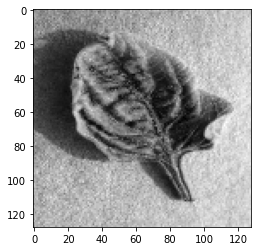

(128, 128)
Tomato__Tomato_YellowLeaf__Curl_Virus


In [10]:
for image , label in zip(images[::500] , labels[::500]):
    plt.imshow(image , cmap='gray')
    plt.show()
    print(image.shape)
    print(label)

In [11]:
encoder = LabelEncoder()
classes = encoder.fit_transform(labels)

In [12]:
encoder.classes_

array(['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy',
       'Potato___Early_blight', 'Potato___Late_blight',
       'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight',
       'Tomato_Late_blight', 'Tomato_Leaf_Mold',
       'Tomato_Septoria_leaf_spot',
       'Tomato_Spider_mites_Two_spotted_spider_mite',
       'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus',
       'Tomato__Tomato_mosaic_virus', 'Tomato_healthy'], dtype='<U43')

In [13]:
klass , count = np.unique(classes,return_counts=True)

In [14]:
klass

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [15]:
count

array([ 997, 1477, 1000, 1000, 1064, 2127, 1000, 1908,  952, 1771, 1676,
       1404, 3208, 1119, 1591], dtype=int64)

In [16]:
dataset = list(zip(images, labels , classes)) 

In [17]:
random.shuffle(dataset)

In [18]:
images , labels, classes = zip(*dataset) 

In [19]:
x = np.array(images)

In [20]:
y = np.array(classes)

In [21]:
print(x.shape , y.shape)

(22294, 128, 128) (22294,)


In [22]:
split = int(0.8*x.shape[0])


x_train = x[:split]
x_test = x[split:]

y_train = y[:split]
y_test = y[split:]

In [23]:
print(x_train.shape , y_train.shape , x_test.shape , y_test.shape)

(17835, 128, 128) (17835,) (4459, 128, 128) (4459,)


In [24]:
# from keras.layers import Conv2D , Dense , Activation , MaxPool2D ,Flatten , BatchNormalization , Dropout
# from keras.models import Sequential
from keras.utils import to_categorical

In [25]:
#Converting to One_Hot_Vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)


(17835, 15)
(4459, 15)


In [26]:
x_train = x_train/255
x_test = x_test/255

In [27]:
np.save(("x_train_gray"),x_train)
np.save(("x_test_gray"),x_test)
np.save(("y_train_gray"),y_train)
np.save(("y_test_gray"),y_test)